**INITIALIZATION:**
- I use these three lines of code on top of my each notebooks because it will help to prevent any problems while reloading the same project. And the third line of code helps to make visualization within the notebook.

In [1]:
#@ INITIALIZATION: 
%reload_ext autoreload
%autoreload 2
%matplotlib inline

**DOWNLOADING LIBRARIES AND DEPENDENCIES:**
- I have downloaded all the libraries and dependencies required for the project in one particular cell.

In [2]:
#@ DOWNLOADING LIBRARIES AND DEPENDENCIES: 
import argparse
import imutils
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

### **IMAGE ROTATION:**

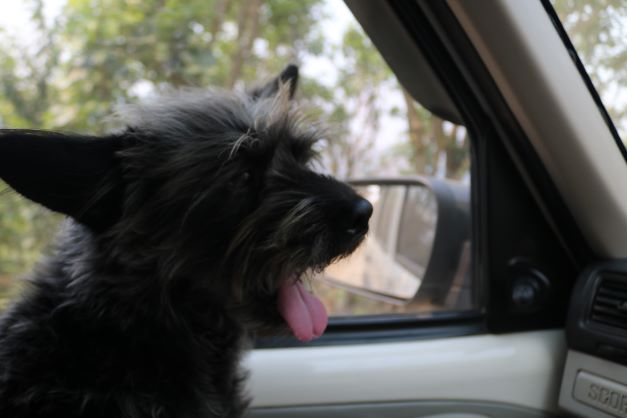

In [3]:
#@ LOADING THE IMAGE: 
image = cv2.imread("/content/Bal1.JPG")         # Loading Image. 
cv2_imshow(image)                               # Inspecting Image. 

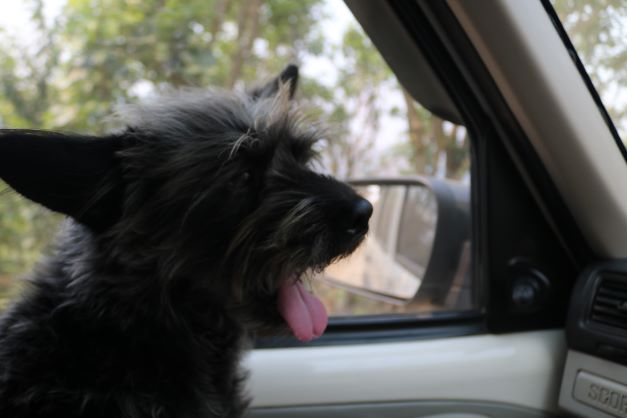

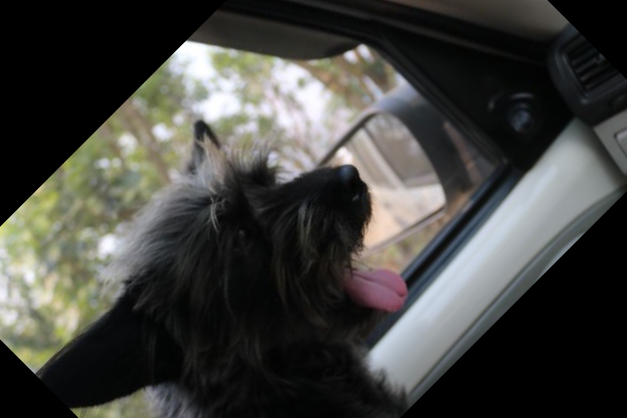

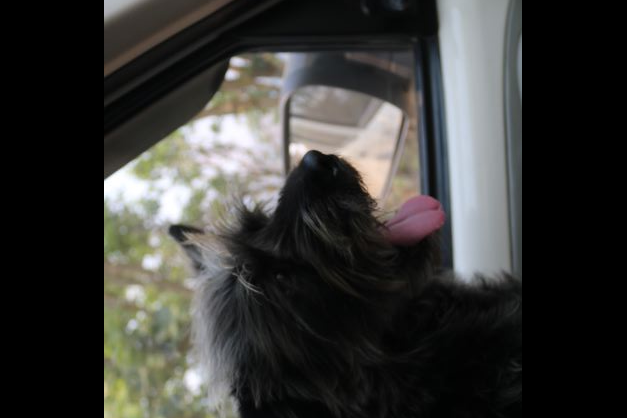

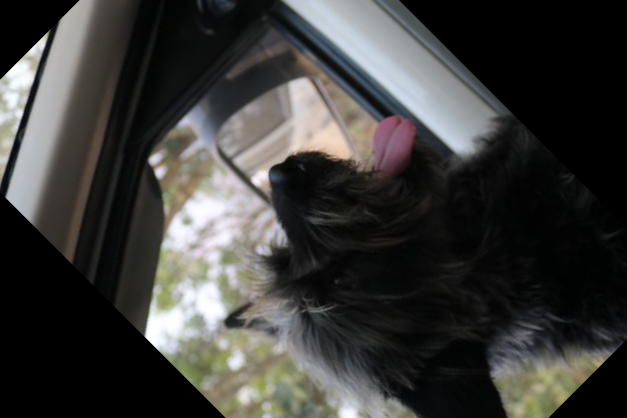

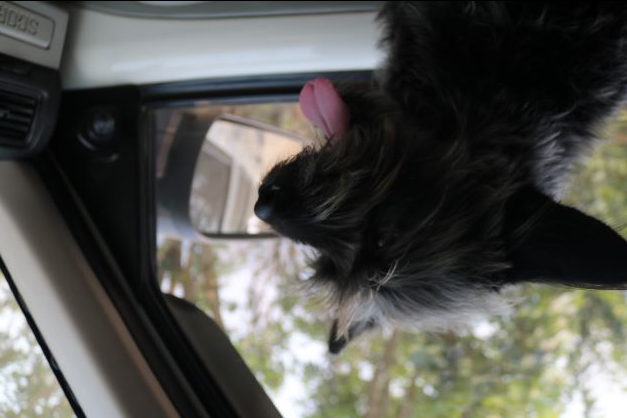

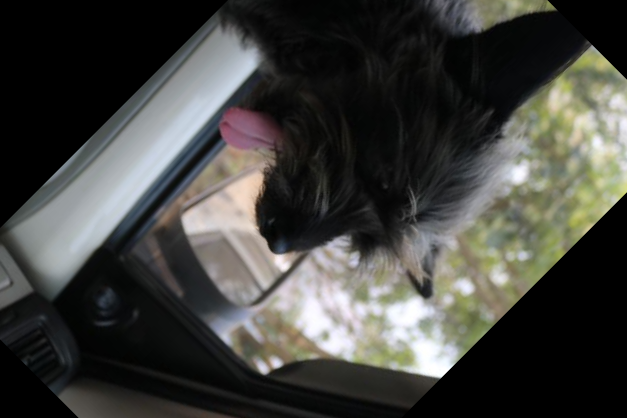

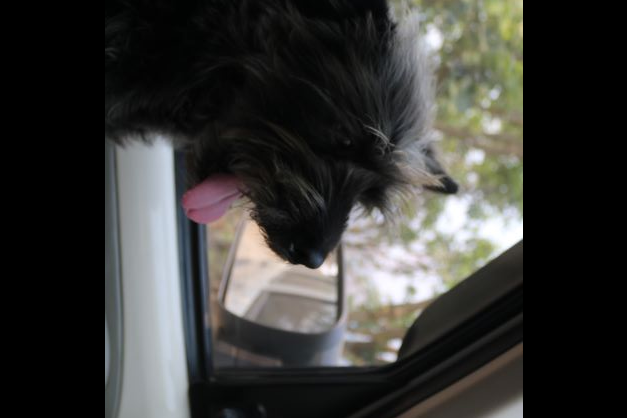

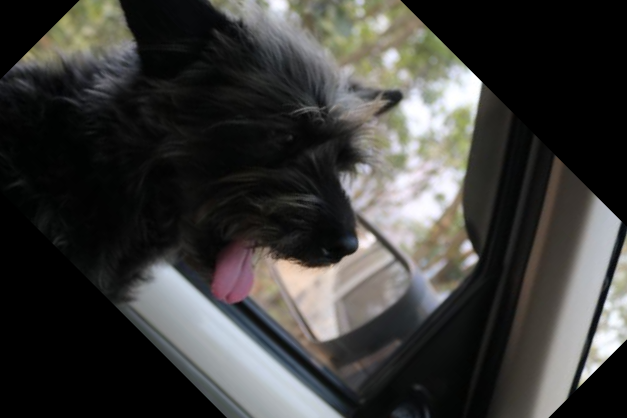

In [4]:
#@ INITIALIZING IMAGE ROTATION:
for angle in np.arange(0, 360, 45):                # Looping Over Rotation Angles. 
    rotated = imutils.rotate(image, angle)         # Rotating Image. 
    cv2_imshow(rotated)                            # Inspecting Image. 

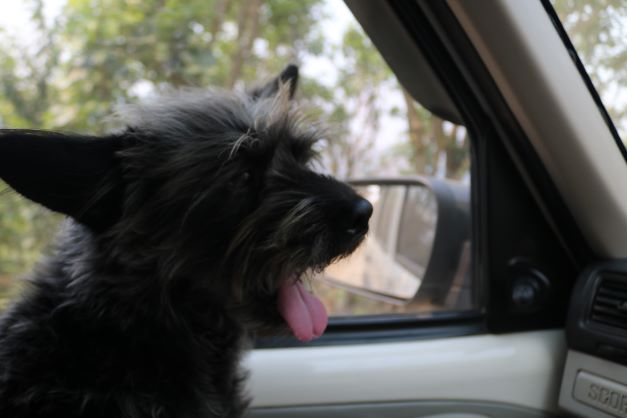

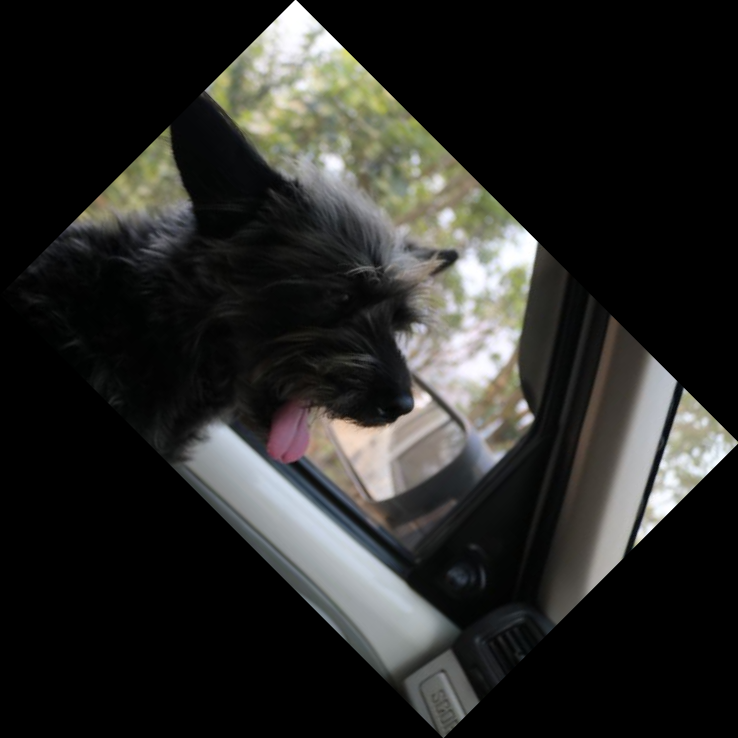

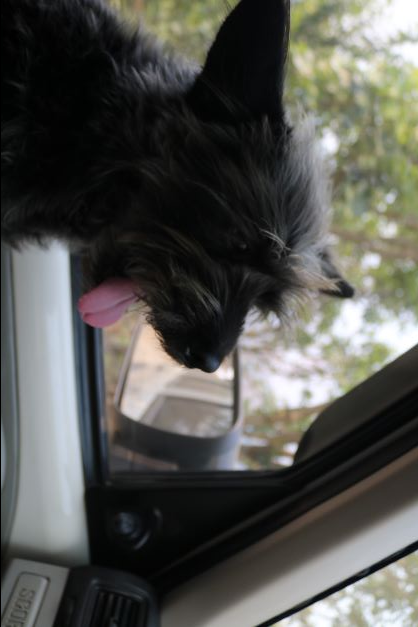

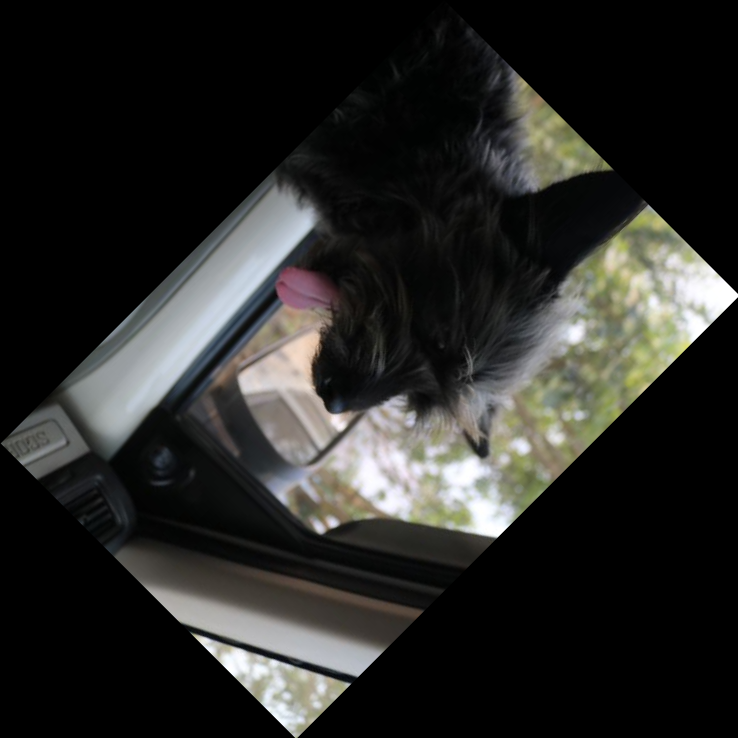

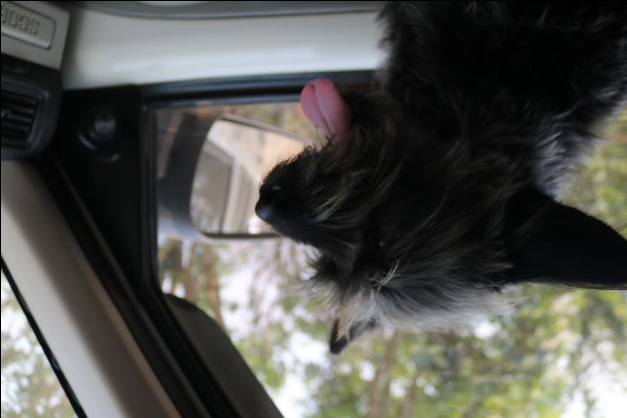

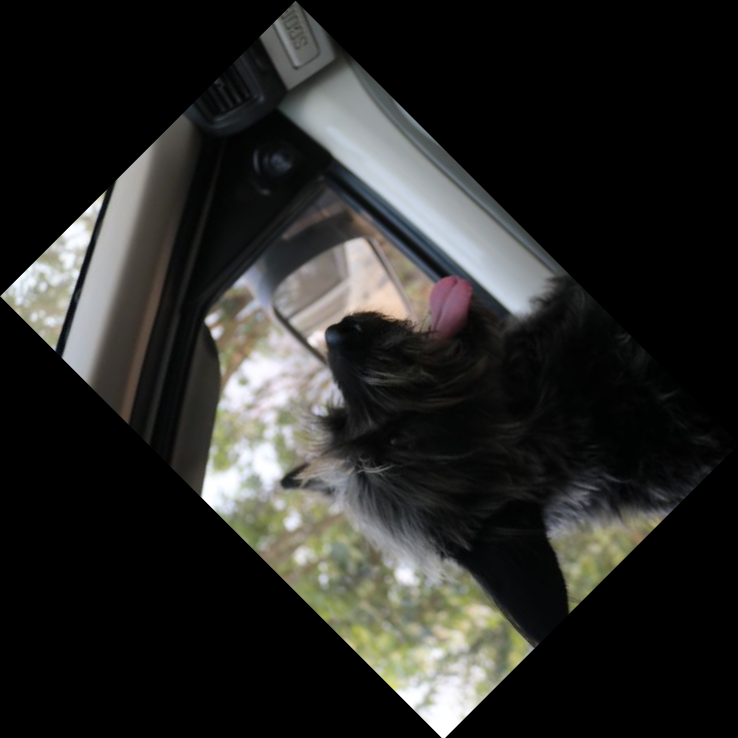

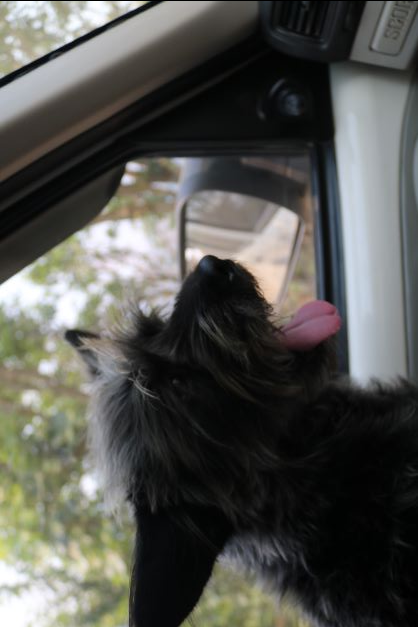

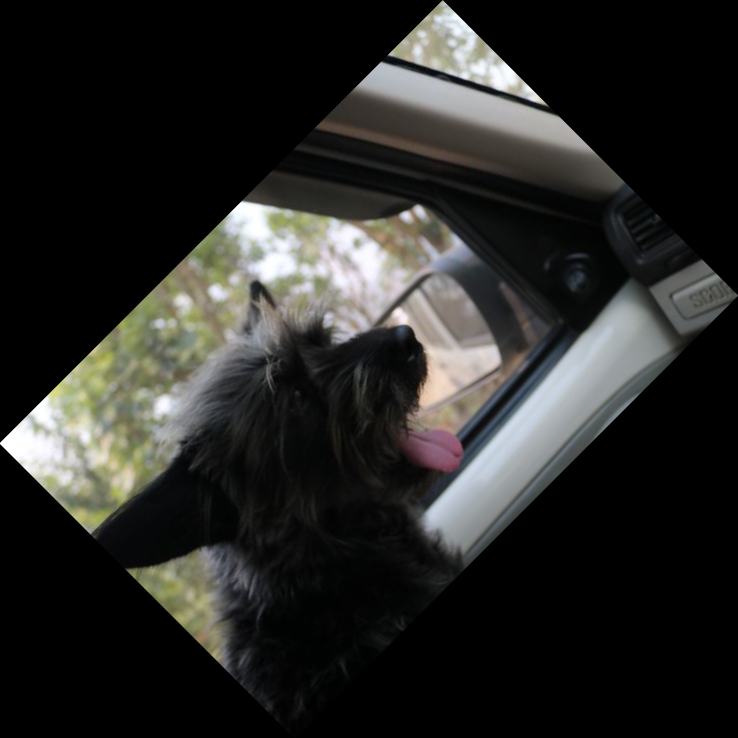

In [5]:
#@ INITIALIZING IMAGE ROTATION: WITHOUT CUT OFF: 
for angle in np.arange(0, 360, 45):                # Looping Over Rotation Angles. 
    rotated = imutils.rotate_bound(image, angle)   # Rotating Image. 
    cv2_imshow(rotated)                            # Inspecting Image. 

In [6]:
#@ IMPLEMENTATION OF ROTATE BOUND FUNCTION: 
def rotate_bound(image, angle):                     # Defining Function. 
    (h, w) = image.shape[:2]                        # Initializing Height and Width of Image. 
    (cX, xY) = (w // 2, h // 2)                     # Initializing Center of Image.  
    M = cv2.getRotationMatrix2D((cX,cY),-angle,1.0) # Getting Rotation Matrix. 
    cos = np.abs(M[0, 0])                           # Initialization. 
    sin = np.abs(M[0, 1])                           # Initialization. 
    nW = int((h * sin) + (w * cos))                 # Initializing New Width. 
    nH = int((h * cos) + (w * sin))                 # Initializing New Height. 
    M[0, 2] += (nW / 2) - cX                        # Adjusting Rotation Matrix. 
    M[1, 2] += (nH / 2) - cY                        # Adjusting Rotation Matrix. 
    return cv2.warpAffine(image, M, (nW, nH))       # Initializing Rotation. 

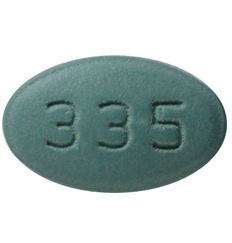

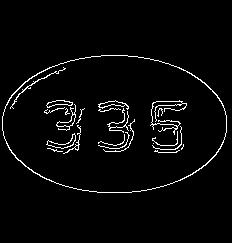

In [7]:
#@ LOADING AND CONVERTING INTO GRAYSCALE: 
image = cv2.imread("/content/MM.jpg")               # Loading Image. 
cv2_imshow(image)                                   # Inspecting Image. 
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)      # Converting into Grayscale. 
gray = cv2.GaussianBlur(gray, (3, 3), 0)            # Blurring Image. 
edged = cv2.Canny(gray, 20, 100)                    # Initializing Edge Detection. 
cv2_imshow(edged)                                   # Inspecting Image. 

In [8]:
#@ FINDING CONTOURS OF AN IMAGE: 
cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, 
                        cv2.CHAIN_APPROX_SIMPLE)                # Finding Contours of Image Map. 
cnts = imutils.grab_contours(cnts)                              # Initializing Contours. 

In [9]:
#@ GETTING ROI OF AN IMAGE:
if len(cnts) > 0:
    c = max(cnts, key=cv2.contourArea)                          # Getting Largest Contour. 
    mask = np.zeros(gray.shape, dtype="uint8")                  # Drawing a Mask. 
    cv2.drawContours(mask, [c], -1, 255, -1)                    # Drawing Contours. 
    (x, y, w, h) = cv2.boundingRect(c)                          # Getting Bounding Box. 
    imageROI = image[y:y + h, x:x + w]                          # Initializing Image ROI. 
    maskROI = mask[y:y + h, x:x + w]                            # Initializing Mask ROI. 
    imageROI = cv2.bitwise_and(imageROI, imageROI,
                               mask=maskROI)                    # Getting ROI of Image. 

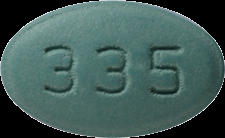

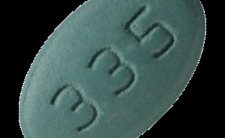

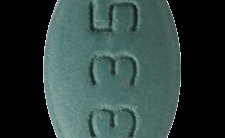

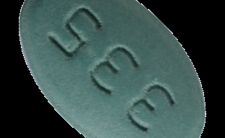

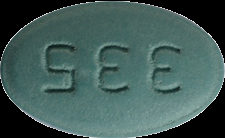

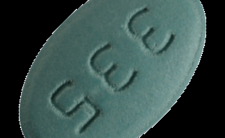

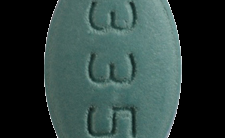

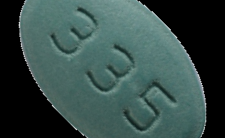

In [11]:
#@ INITIALIZING IMAGE ROTATION:
for angle in np.arange(0, 360, 45):                # Looping Over Rotation Angles. 
    rotated = imutils.rotate(imageROI, angle)      # Rotating Image. 
    cv2_imshow(rotated)                            # Inspecting Image. 

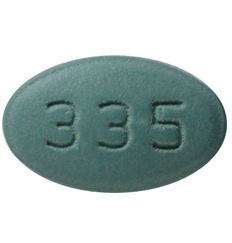

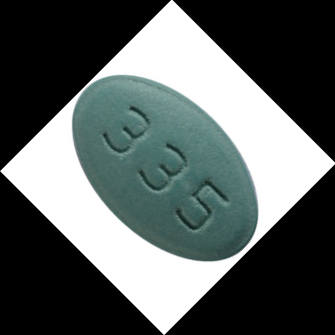

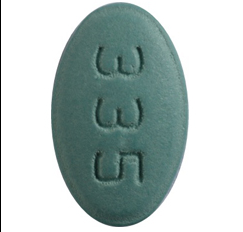

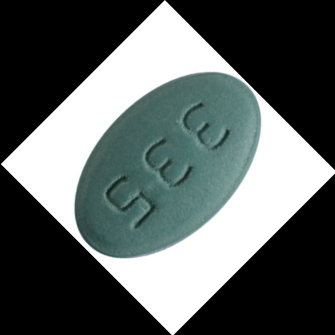

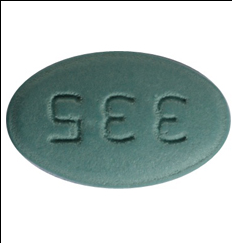

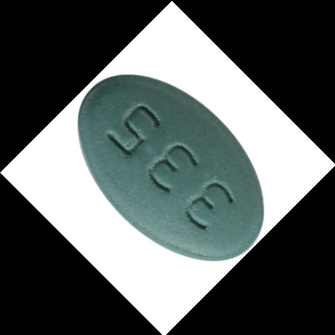

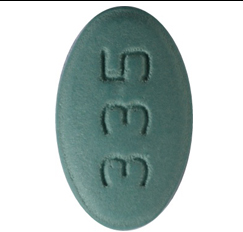

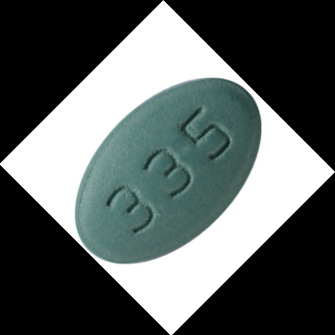

In [12]:
#@ INITIALIZING IMAGE ROTATION: WITHOUT CUT OFF: 
for angle in np.arange(0, 360, 45):                # Looping Over Rotation Angles. 
    rotated = imutils.rotate_bound(image, angle)   # Rotating Image. 
    cv2_imshow(rotated)                            # Inspecting Image. 